In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("/config/workspace/Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
df = df.drop(["ID"],axis=1)

In [10]:
columns = df.columns
numeric_features = []
categorical_features = []
for count in range(0,len(df.columns)):
    if df.nunique().values[count]<12:
        categorical_features.append(df.nunique().index[count])
    else:
        numeric_features.append(df.nunique().index[count])

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

We have 10 categorical features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']


In [11]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
df.duplicated().sum()

35

In [13]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)

2    60.373333
1    39.626667
Name: SEX, dtype: float64
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0

In [14]:
df["EDUCATION"] = df["EDUCATION"].map({0:0,1:1,2:2,3:3,4:4,5:4,6:4})
df["MARRIAGE"] = df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [15]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)

2    60.373333
1    39.626667
Name: SEX, dtype: float64
2    46.766667
1    35.283333
3    16.390000
4     1.513333
0     0.046667
Name: EDUCATION, dtype: float64
2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64
 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1   

Positive: 23364, Negative: 6636


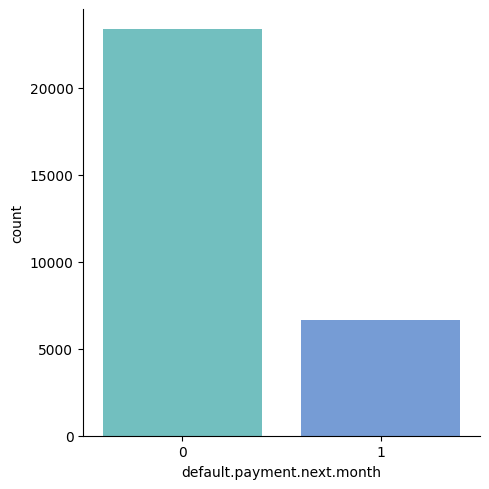

In [16]:
pos = df[df['default.payment.next.month']== 0].shape[0]
neg = df[df['default.payment.next.month']== 1].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="default.payment.next.month", kind="count", palette="winter_r", alpha=.6)
plt.show()

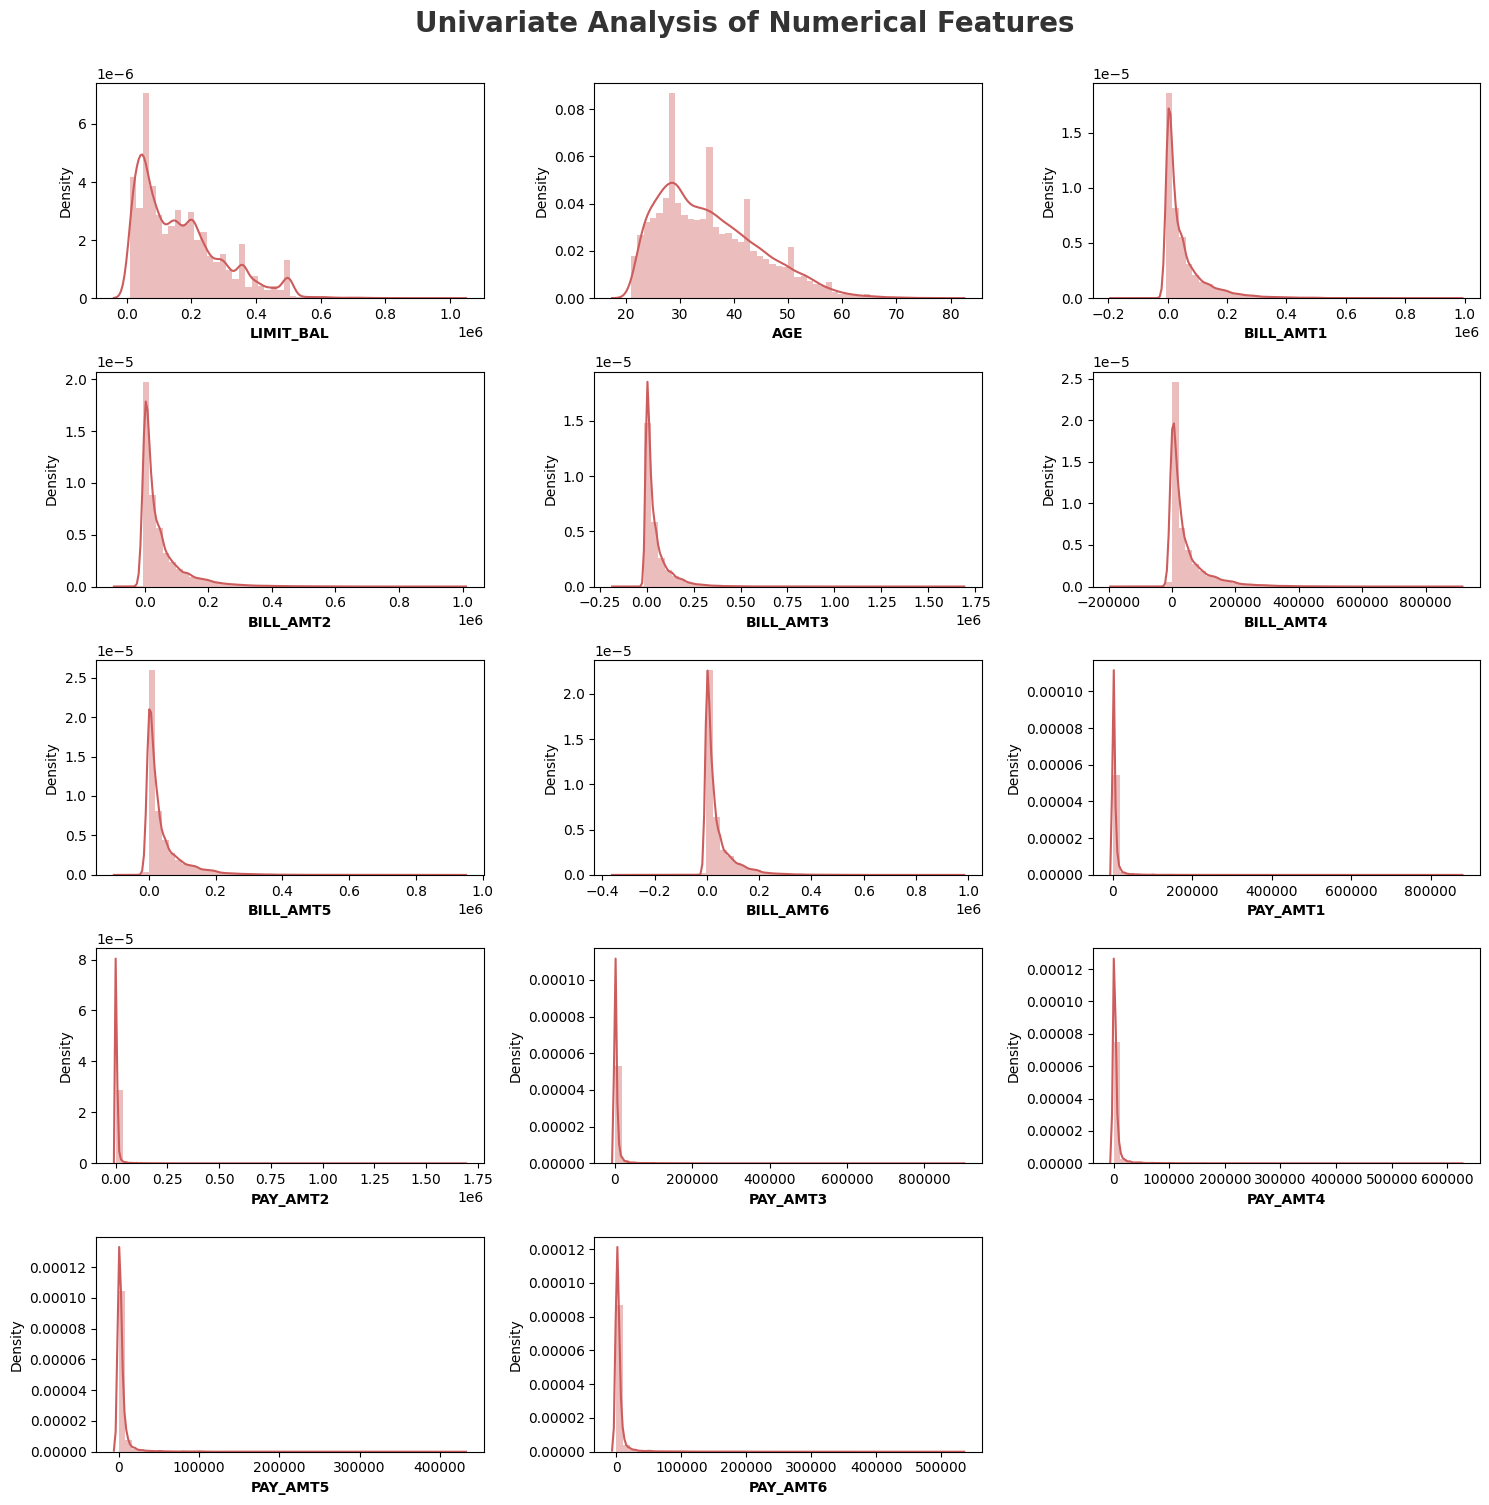

In [17]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

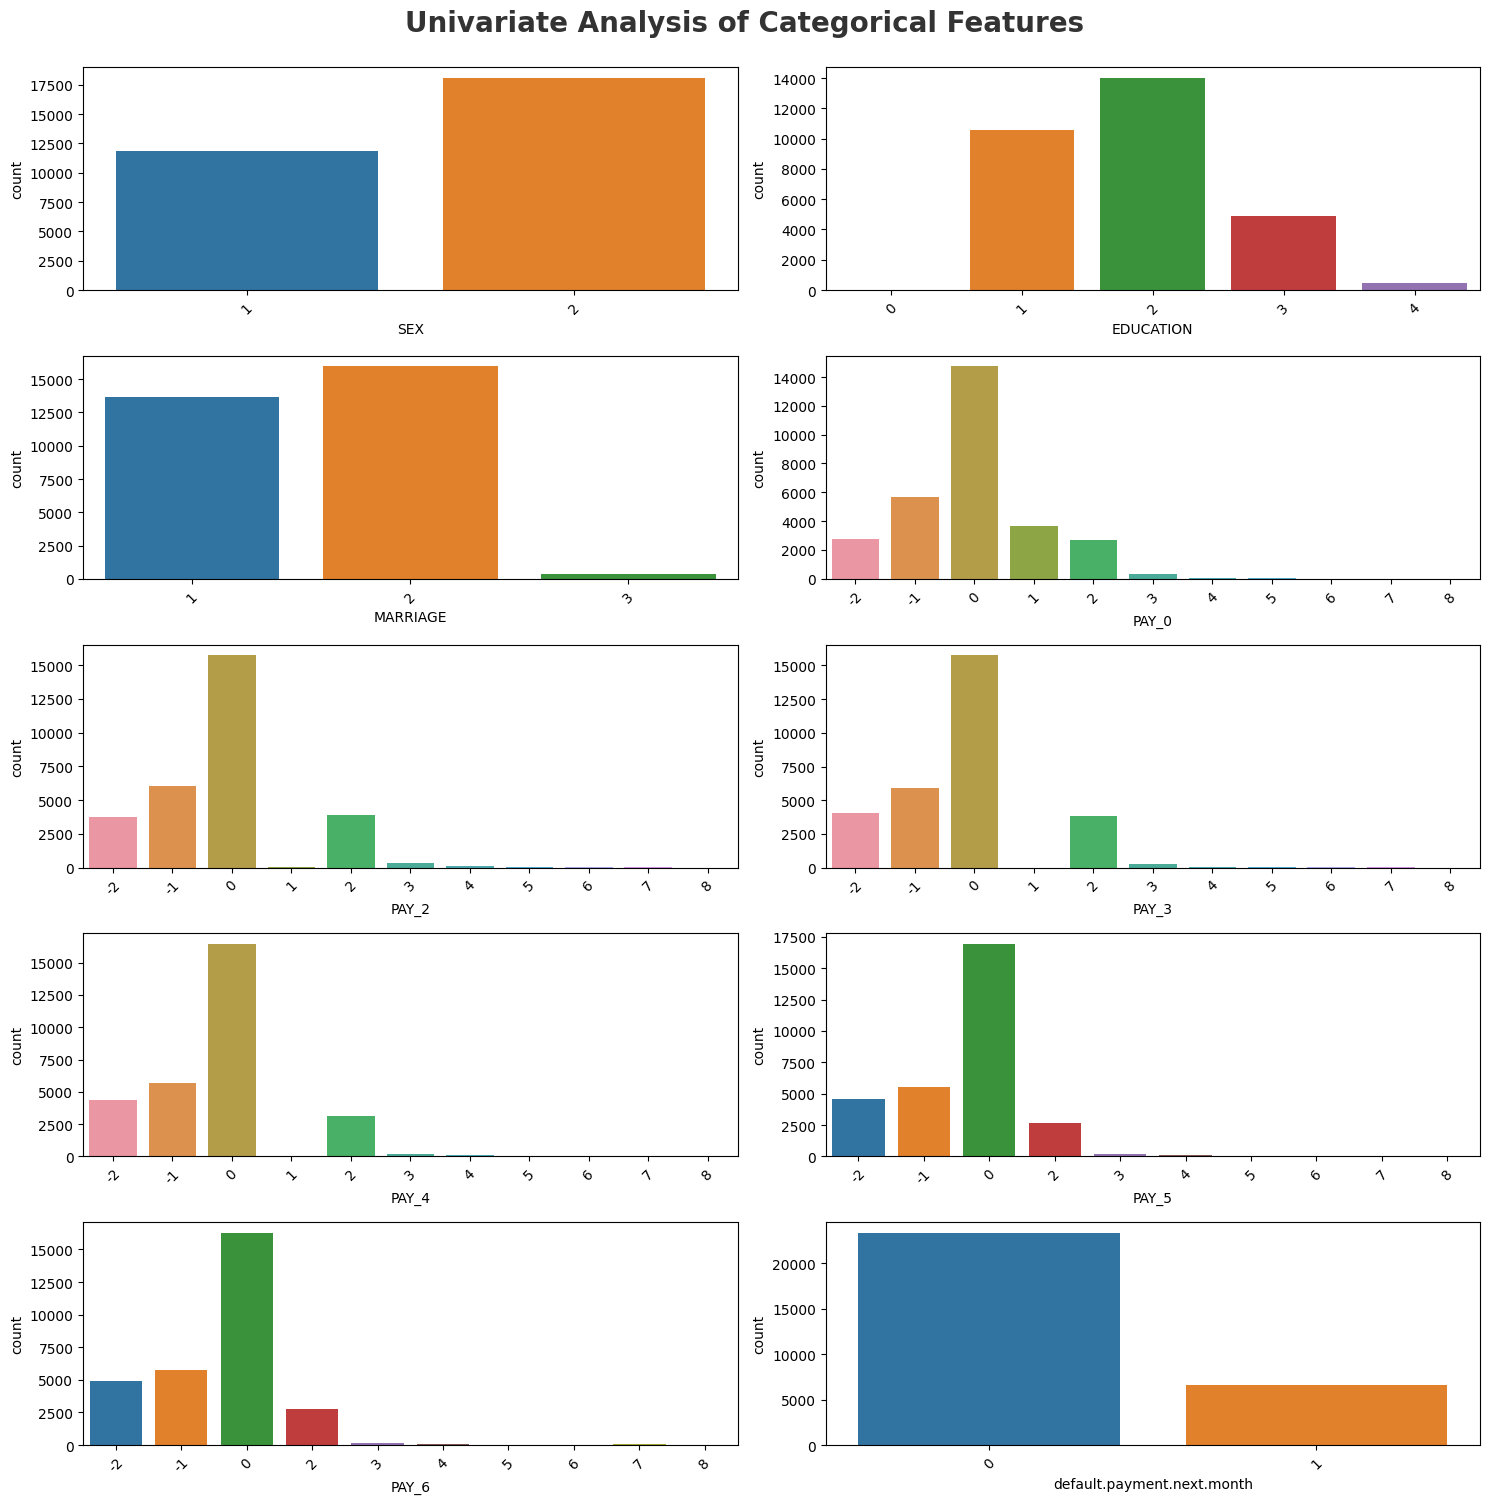

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [19]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [20]:

# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [21]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train, y_train, X_test, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [22]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [23]:
X = df.drop("default.payment.next.month",axis=1)
X_list = list(X.columns)
y = df["default.payment.next.month"]

In [24]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
RS = RobustScaler()
X_train_rs = RS.fit_transform(X_train)
X_test_rs = RS.transform(X_test)

In [33]:
rs_report = evaluate_models(X_train_rs,y_train,X_test_rs,y_test,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9987
- Precision: 0.9992
- Recall: 0.9981
- Roc Auc Score: 0.9990
- COST: 5040.
----------------------------------
Model performance for Test set
- Accuracy: 0.8158
- F1 score: 0.4644
- Precision: 0.6387
- Recall: 0.3648
- Roc Auc Score: 0.6535
- COST: 419710.


Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9988
- Precision: 1.0000
- Recall: 0.9976
- Roc Auc Score: 0.9988
- COST: 6500.
----------------------------------
Model performance for Test set
- Accuracy: 0.7235
- F1 score: 0.3867
- Precision: 0.3757
- Recall: 0.3983
- Roc Auc Score: 0.6065
- COST: 403690.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8263
- F1 score: 0.4920
- Precision: 0.6998
- Recall: 0.3793
- Roc Auc Score: 0.6665
- COST: 1660660.
----------------------------------
Model performance for Test set
- Accuracy: 0.8202
- F1 score: 0.4635
- Precision: 0.6676
- Recall: 0.3549


In [34]:
rs_report

,Model Name,Cost
1,Decision Tree,403690
5,XGBClassifier,419670
0,Random Forest,419710
2,Gradient Boosting,425820
4,K-Neighbors Classifier,426300
6,AdaBoost Classifier,459370
3,Logistic Regression,502870


In [35]:
from imblearn.combine import SMOTETomek
smt_rs = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=1)
X_train_res,y_train_res = smt_rs.fit_resample(X_train_rs,y_train)
X_test_res,y_test_res = smt_rs.fit_resample(X_test_rs,y_test)

In [36]:
rs_sampling_report = evaluate_models(X_train_res,y_train_res,X_test_res,y_test_res,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9996
- Recall: 0.9997
- Roc Auc Score: 0.9996
- COST: 2580.
----------------------------------
Model performance for Test set
- Accuracy: 0.7873
- F1 score: 0.7628
- Precision: 0.8624
- Recall: 0.6838
- Roc Auc Score: 0.7873
- COST: 736550.


Decision Tree
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 1.0000
- Recall: 0.9993
- Roc Auc Score: 0.9996
- COST: 6500.
----------------------------------
Model performance for Test set
- Accuracy: 0.7230
- F1 score: 0.7060
- Precision: 0.7522
- Recall: 0.6652
- Roc Auc Score: 0.7230
- COST: 784640.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8326
- F1 score: 0.8220
- Precision: 0.8773
- Recall: 0.7733
- Roc Auc Score: 0.8326
- COST: 2104380.
----------------------------------
Model performance for Test set
- Accuracy: 0.8314
- F1 score: 0.8222
- Precision: 0.8698
- Recall: 0.7796


In [37]:
rs_sampling_report

,Model Name,Cost
5,XGBClassifier,433740
2,Gradient Boosting,515400
6,AdaBoost Classifier,581610
0,Random Forest,736550
1,Decision Tree,784640
3,Logistic Regression,809980
4,K-Neighbors Classifier,838430


In [25]:
SS = StandardScaler()
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [26]:
ss_report = evaluate_models(X_train_ss,y_train,X_test_ss,y_test,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9986
- Precision: 0.9991
- Recall: 0.9981
- Roc Auc Score: 0.9989
- COST: 5050.
----------------------------------
Model performance for Test set
- Accuracy: 0.8150
- F1 score: 0.4622
- Precision: 0.6352
- Recall: 0.3633
- Roc Auc Score: 0.6524
- COST: 420740.


Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9988
- Precision: 1.0000
- Recall: 0.9976
- Roc Auc Score: 0.9988
- COST: 6500.
----------------------------------
Model performance for Test set
- Accuracy: 0.7242
- F1 score: 0.3936
- Precision: 0.3792
- Recall: 0.4090
- Roc Auc Score: 0.6107
- COST: 396790.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8263
- F1 score: 0.4920
- Precision: 0.6998
- Recall: 0.3793
- Roc Auc Score: 0.6665
- COST: 1660660.
----------------------------------
Model performance for Test set
- Accuracy: 0.8203
- F1 score: 0.4637
- Precision: 0.6686
- Recall: 0.3549


In [27]:
ss_report

,Model Name,Cost
1,Decision Tree,396790
5,XGBClassifier,419660
0,Random Forest,420740
4,K-Neighbors Classifier,423850
2,Gradient Boosting,425810
6,AdaBoost Classifier,459370
3,Logistic Regression,502870


In [28]:
from imblearn.combine import SMOTETomek
smt_ss = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=1)
X_train_ses,y_train_ses = smt_ss.fit_resample(X_train_ss,y_train)
X_test_ses,y_test_ses = smt_ss.fit_resample(X_test_ss,y_test)

In [29]:
ss_sampling_report = evaluate_models(X_train_ses,y_train_ses,X_test_ses,y_test_ses,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9996
- Recall: 0.9997
- Roc Auc Score: 0.9996
- COST: 2580.
----------------------------------
Model performance for Test set
- Accuracy: 0.7657
- F1 score: 0.7327
- Precision: 0.8528
- Recall: 0.6422
- Roc Auc Score: 0.7657
- COST: 823070.


Decision Tree
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 1.0000
- Recall: 0.9993
- Roc Auc Score: 0.9996
- COST: 6500.
----------------------------------
Model performance for Test set
- Accuracy: 0.7133
- F1 score: 0.6953
- Precision: 0.7420
- Recall: 0.6541
- Roc Auc Score: 0.7133
- COST: 801400.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8178
- F1 score: 0.8050
- Precision: 0.8662
- Recall: 0.7519
- Roc Auc Score: 0.8178
- COST: 2284690.
----------------------------------
Model performance for Test set
- Accuracy: 0.8114
- F1 score: 0.7989
- Precision: 0.8555
- Recall: 0.7494


In [38]:
ss_sampling_report

,Model Name,Cost
5,XGBClassifier,422310
2,Gradient Boosting,578790
6,AdaBoost Classifier,716690
1,Decision Tree,801400
3,Logistic Regression,802680
0,Random Forest,823070
4,K-Neighbors Classifier,873870
